# HW3

Melvin Macaranas 6030478021

In [1]:
#import everything here
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_float
import math
import pandas as pd

## The face database

In [2]:
data = scipy.io.loadmat('./facedata.mat')

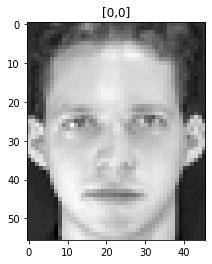

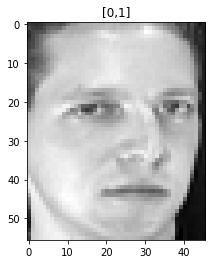

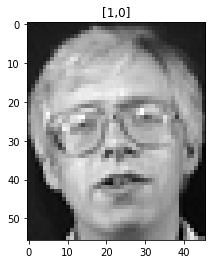

In [3]:
xf = {}
xf[0,0] = img_as_float(data['facedata'][0,0])
plt.imshow(xf[0,0],cmap="gray")
plt.title('[0,0]')
plt.show()

xf[0,1] = img_as_float(data['facedata'][0,1])
plt.imshow(xf[0,1],cmap="gray")
plt.title('[0,1]')
plt.show()

xf[1,0] = img_as_float(data['facedata'][1,0])
plt.imshow(xf[1,0],cmap="gray")
plt.title('[1,0]')
plt.show()

### T5

In [4]:
xf[0,0] = img_as_float(data['facedata'][0,0]).reshape((2576))
xf[0,1] = img_as_float(data['facedata'][0,1]).reshape((2576))
xf[1,0] = img_as_float(data['facedata'][1,0]).reshape((2576))

In [5]:
print('Euclidean distance between xf[0,0] and xf[0,1] is ' + str( math.sqrt(sum((xf[0,0]-xf[0,1])**2)) ))
print('Euclidean distance between xf[0,0] and xf[1,0] is ' + str( math.sqrt(sum((xf[0,0]-xf[1,0])**2)) ))

Euclidean distance between xf[0,0] and xf[0,1] is 10.037616294165483
Euclidean distance between xf[0,0] and xf[1,0] is 8.17329509973728


**Answer T5** : คิดว่า่ไม่ค่อย make sense เพราะว่า xf[0,0] กับ xf[0,1] เป็นหน้าของคนเดียวกันแต่กลับมีค่าของ Euclidean Distance มากกว่าของ xf[0,0] กับ xf[1,0]
ซึ่งเป็นหน้าของคนละคนกันด้วยซ้ำ แต่คิดว่าคงต้องมีการปรับแก้เล็กน้อยและมันจะมีประโยชน์ในการทำ face verification system.

### T6

In [6]:
def getSimilarityMatrix(T, D):
    A = np.ones((T.shape[0],D.shape[0]), dtype = float)
    for i in range(T.shape[0]):
        for j in range(D.shape[0]):
            A[i,j] = math.sqrt(sum(( img_as_float(T[i]).reshape((2576)) - img_as_float(D[j]).reshape((2576)))**2))
    return A

In [7]:
T = data['facedata'][:,0:3].reshape(120)
D = data['facedata'][:,3:].reshape(280)

A = getSimilarityMatrix(T,D)

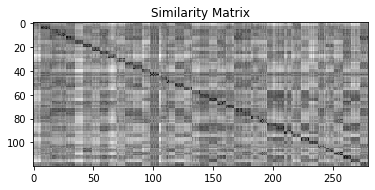

In [8]:
plt.imshow(A,cmap="gray")
plt.title('Similarity Matrix')
plt.show()

### T7

ถ้าสังเกตจากแนวเส้นทแยงตรงกลางที่เป็นสีดำสนิท แปลว่ายิ่งภาพมีความคล้ายกันมากเท่าไหร่สีจะยิ่งเข้มขึ้นเท่านั้น
ดังนั้นคนที่ 2 น่าจะมีรูปทั้ง 5 รูปที่คล้ายกันมาก เพราะว่าสีในช่วงที่รูปจากคนที่ 2 เทียบกับตัวเองมีความเข้มมาก
ส่วนคนแรกสีไม่ค่อยเข้มดังนั้นแต่ละรูปของเขาน่าจะไม่ค่อยคล้ายกัน

### T8

In [9]:
AA = np.ones((A.shape[0]//3,A.shape[1]))
for i in range(0,A.shape[0],3):
    for j in range(A.shape[1]):
        AA[i//3,j] = min(A[i,j], A[i+1,j], A[i+2,j])

In [10]:
def getResult(A, t):
    
    prediction = (A < t).astype(int)
    
    truePositive = 0 # Predict 1 Answer 1
    falseAlarm = 0 # Predict 1 Answer 0
    falseNegative = 0
    trueNegative = 0
    
    for i in range(prediction.shape[0]):
        for j in range(prediction.shape[1]):
            
            result = prediction[i,j]
            
            answer = 0
            if i == j//7:
                answer = 1
                
            if result == 1 and answer == 1:
                truePositive += 1
            elif result == 1 and answer == 0:
                falseAlarm += 1
            elif result == 0 and answer == 1:
                falseNegative += 1
            elif result == 0 and answer == 0:
                trueNegative += 1
                
    return (truePositive, falseAlarm, falseNegative, trueNegative)

In [11]:
[truePositive, falseAlarm, falseNegative, trueNegative] = getResult(AA,10)
print('true positive rate = ' + str(truePositive/(truePositive+falseNegative)*100) + ' %')
print('false alarm rate = ' + str(falseAlarm/(falseAlarm+trueNegative)*100) + ' %')

true positive rate = 99.64285714285714 %
false alarm rate = 45.64102564102564 %


In [12]:
print(truePositive)
print(falseAlarm)
print(falseNegative)
print(trueNegative)

279
4984
1
5936


### T9

In [13]:
def getMinMax(A):
    least = 10000
    most = -10000
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            if A[i,j] < least:
                least = A[i,j]
            if A[i,j] > most:
                most = A[i,j]
    return (least,most)

In [14]:
[least, most] = getMinMax(A)
print('minimum = ' + str(least))
print('maximum = ' + str(most))

minimum = 1.7420153428787815
maximum = 17.541726165424738


In [15]:
t = np.arange(least, most + (least+most)/1000, (least+most)/1000)

In [16]:
recallList = []
falsePositiveRateList = []
for tt in t:
    [truePositive, falsePositive, falseNegative, trueNegative] = getResult(AA, tt)
    
    falseAlarmRate = falsePositive/(falsePositive+trueNegative)
    if( abs(falseAlarmRate - 0.1) < 1e-3):
        print('recall rate at 0.1% false alarm rate = ' + str(truePositive / (truePositive + falseNegative)))
    
    falsePositiveRateList.append(falsePositive / (falsePositive + trueNegative))
    recallList.append(truePositive / (truePositive + falseNegative))

recall rate at 0.1% false alarm rate = 0.9214285714285714


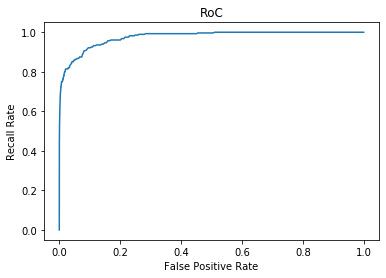

In [17]:
# plot RoC
plt.plot(np.array(falsePositiveRateList),np.array(recallList))
plt.title('RoC')
plt.xlabel('False Positive Rate')
plt.ylabel('Recall Rate')
plt.show()

### T10

*EER (Equal Error Rate)* คือ จุดของค่า threshold ที่ทำให้ false acceptance rate (false alarm rate) = false rejection rate

*recall rate at 0.1% false alarm rate* คือ 0.9214285714285714 (จากการรันในข้อ T9)

### Principle Component Analysis (PCA)

### T11

In [18]:
meanFace = np.zeros(2576)
for c in T:
    meanFace += c.reshape(2576)
meanFace /= T.shape[0]

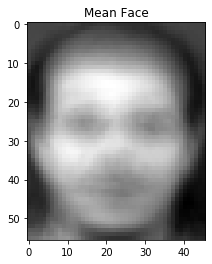

In [19]:
meanFace_float = img_as_float(meanFace)
plt.imshow(meanFace_float.reshape((56,46)),cmap="gray")
plt.title('Mean Face')
plt.show()

### T12

**size of the covariance matrix** = 2576 x 2576

**rank of the covariance matrix** = มากสุด 119 เพราะว่ามีทั้งหมด 120 training examples และหักออกอันนึงสำหรับ mean

### T13

**size of the gram matrix** = 120 x 120

**rank of the gram matrix** = 

**non-zero eigenvalues** = 

### T14

เนื่องจาก Gram matrix นั้นเป็น inner product ของ X<sup>T</sup>X และ (X<sup>T</sup>X)<sup>T</sup> = X<sup>T</sup>X ดังนั้น Gram matrix จึง symmetric

### T15

In [20]:
# sample matrix
X = np.array([T[i].reshape(2576) - meanFace.reshape(2576) for i in range(T.shape[0])]).T
X.shape

(2576, 120)

In [21]:
# gram matrix
gramMatrix = (X.T).dot(X)
gramMatrix.shape

(120, 120)

In [22]:
eValues,eVectors = np.linalg.eigh(gramMatrix)
eVectors = eVectors.T

In [23]:
print(eVectors.shape)
print(eValues.shape)

(120, 120)
(120,)


In [24]:
eigen = sorted(list(zip(eValues, eVectors)), reverse = True)

In [25]:
# count non zero
count = 0
for i in range(len(eigen)):
    eValue = eigen[i][0]
    if abs(eValue) < 1e-3:
        print(str(eValue) + ' is zero')
    else:
        count += 1
print('total non-zero is ' +str(count))

-3.047988665097621e-09 is zero
total non-zero is 119


### T16

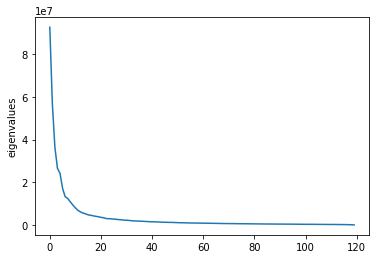

In [26]:
y = np.sort(eValues)[::-1]
x = [i for i in range(len(y))]
plt.plot(x,y)
plt.ylabel('eigenvalues')
plt.show()

In [27]:
totalVariance = sum(y)
variance = 0
count = 0
for eValue in y:
    variance += eValue
    count += 1
    if variance >= 0.95*(totalVariance): 
        break
        
print('we need ' + str(count) + ' eigenvectors to keep 95% of total variance')

we need 64 eigenvectors to keep 95% of total variance


### T17

In [53]:
faceVector = np.copy(eVectors)
faceVector = X.dot(faceVector)
temp = []


for i in range(faceVector.shape[0]):
    e = faceVector[i][1]
    e = X.dot(e)
    e /= np.linalg.norm(e)
#     print(e.shape)
    temp.append(e)
    
faceVector = np.array(temp)
# print(faceVector.shape)

for i in range(10):
    plt.imshow((faceVector[i,:]*-1).reshape((56,46)),cmap="gray")
    plt.title('eigenface #' + str(i+1))
    plt.show()

MemoryError: Unable to allocate array with shape (2576, 120) and data type float64

### T18

**first eigenvector** = จับบริเวณผม

**second eigenvector** = จับบริเวณผม ไหล่ และตา

**biggest variance** = คิดว่าถูกเก็บไว้ใน 2 รูปแรก เพราะว่าส่วนประกอบของ 2 รูปแรกเป็นส่วนที่แต่ละคนมีเหมือนๆ กัน คือ ผม ตา และบริเวณไหล่

### PCA subspace and the face verification system

### T19

In [ ]:
# V is a matrix whose columns are the eigenvectors, with k = 10
V = faceVector[:10,:]
V.shape

In [ ]:
temp = []
# turn into V
for i in range(len(V)):
    v = V[i]
    v = X.dot(v)
    v /= np.linalg.norm(v)
    temp[i] = v
V = np.array(temp)
V.shape

In [ ]:
# x - mean
x_m = np.array([ (data['facedata'][i,j].reshape(2576)-meanFace) for i in range(40) for j in range(10) ]).T
x_m.shape

In [ ]:
# projection values
p = V.dot(x_m)
p.shape

In [ ]:
len(eigen)

# มาทำต่อด้วย

### T20

# มาทำต่อด้วย

## Linear Discriminant Analysis (LDA)